In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

def synthetic_data(w,b,num_examples):
    """生成y=Xw+b+噪声"""
    X=torch.normal(0,1,(num_examples,len(w)))
    y=torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([ 0.6625, -1.5025]) 
label: tensor([10.6278])


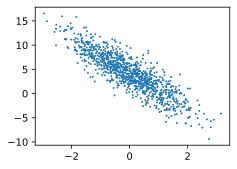

In [2]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1);

In [3]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
        
batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[-1.4500,  1.3782],
        [-0.3814,  1.2893],
        [ 0.1503,  1.0896],
        [ 0.1150, -1.8139],
        [-0.0811, -0.5804],
        [-0.6193,  0.0289],
        [ 0.2936,  0.4096],
        [-1.3445,  1.0315],
        [-0.3169,  0.2969],
        [ 1.4713, -0.3260]]) 
 tensor([[-3.3815],
        [-0.9336],
        [ 0.7832],
        [10.6005],
        [ 6.0109],
        [ 2.8538],
        [ 3.3989],
        [-1.9907],
        [ 2.5671],
        [ 8.2739]])


In [4]:
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

def linreg(X,w,b):
    """线性回归模型"""
    return torch.matmul(X,w)+b

def squared_loss(y_hat,y):
    """均方损失"""
    return (y_hat-y.reshape(y_hat.shape))**2/2

def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param-=lr*param.grad/batch_size
            param.grad.zero_()

In [5]:
lr=0.03
num_epochs=3
net=linreg
loss=squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l=loss(net(features,w,b),labels)
        print(f'epoch {epoch+1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.030550
epoch 2, loss 0.000112
epoch 3, loss 0.000052


In [6]:
print(f'w的估计误差：{true_w-w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b-b}')

w的估计误差：tensor([0.0010, 0.0003], grad_fn=<SubBackward0>)
b的估计误差：tensor([-0.0004], grad_fn=<RsubBackward1>)
